/var/folders/tg/xykldx5d4g3_8jsd0yh_jwkh0000gn/T/ipykernel_12777/246201425.py:17: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = ix[:,np.newaxis]
/Users/arachne/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.09297e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


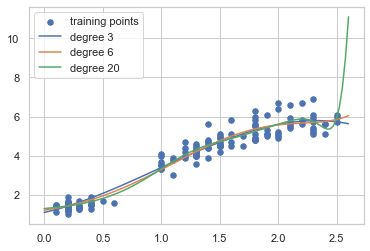

In [47]:
# 초기 데이터를 다항식의깞을 변화시키면서 커브 피팅한 결과
import numpy as np
import matplotlib.pyplot as plt
import seaborn.apionly as sns
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

iris2 =sns.load_dataset('iris')
ix = iris2['petal_width']
iy = iris2['petal_length']

# 피팅된함수르르 보여주기 위한 점 생성
x_plot = np.linspace(0,2.6,100)

# 이 배열을 행렬로 만듬
X = ix[:,np.newaxis]
X_plot = x_plot[:,np.newaxis]

plt.scatter(ix,iy,s=30,marker='o', label="training points")

for count, degree in enumerate([3,6,20]):
    model = make_pipeline(PolynomialFeatures(degree),Ridge())
    model.fit(X,iy)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot,label="degree %d" % degree)
# 20차 다항식은 훈련 데이터셋에 대해 완벽하게 계수를 조정하고, 알려진 값이아닌 미래 데이터에 대해서는 일반화하지않고 거의 발산한다.    
    
plt.legend(loc='upper left')
plt.show()

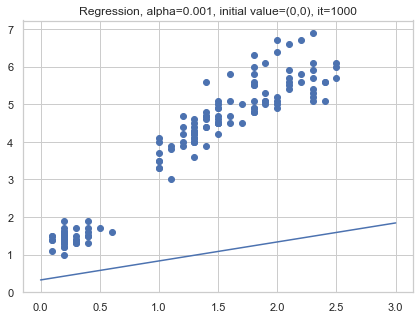

In [59]:
import numpy as np
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt 
sns.set(style='whitegrid', context='notebook')

def least_squares(b0,b1,points):    # 이 함수는 현재 회귀 직선 파라미터인 b0과 b1을 데이터로 받고 실제로 얼마나 좋은지 측정
    totalError = 0
    N = float(len(points))
    for x,y in points:
        totalError +=(y -(b1 * x + b0 )) ** 2
    return totalError/2.*N

def step_gradient(b0_current, b1_current, points, learningRate):
    b0_gradient = 0
    b1_gradient = 0
    N = float(len(points))
    for x,y in points:
        b0_gradient +=(1/N) * (y -((b1_current * x) + b0_current))
        b1_gradient +=(1/N) * x * (y - ((b1_current * x) + b0_current))
    new_b0 = b0_current + (learningRate * b0_gradient)
    new_b1 = b1_current + (learningRate * b1_gradient)
    return [new_b0, new_b1,least_squares(new_b0, new_b1,points)]
# 파라미터로 현재 b0, b1모델을 학습하는 데 사용되는 지점 및 학습 속도를 받는다. step_gradient 함수의 다섯번째 줄에서 
# 두 gradient 의 계산을 볼 수 있고, new_b0과 new_b1의 변수를 반들고, 오차 방향으로 이 변수 값을 학습 속도에 따라 업데이트한다.
# 모든 점을 gradient 계산에 사용한 후에 마지막줄에서는 업데이트된 값과 현재 오차 정도를 반환한다.

def run_gradient_descent(points, starting_b0, starting_b1, learning_rate, num_iterations):
    b0 = starting_b0
    b1 = starting_b1
    slope=[]
    intersect=[]
    error=[]
    for i in range(num_iterations):
        b0,b1,e = step_gradient(b0,b1,np.array(points), learning_rate)
        slope.append(b1)
        intersect.append(b0)
        error.append(e)
    return [b0,b1,e,slope,intersect,error]

# 이 모델 밖에서 훈련을 진행할수 있는 함수를 정의해 모든 파라미터의 조합을 한곳에서 확인할 수 있게한다.
# 이 함수는 파라미터를 초기화하고, gradient 계산을 정해진 횟수만큼 반복한다.
        
    
iris = sns.load_dataset('iris')
X=iris['petal_width'].tolist()
Y=iris['petal_length'].tolist()
points=np.dstack((X,Y))[0]

# 결과의 정확성을 확인하기 위해 아이리스 데이터셋을 불러옴
# numpy의 dstack을 사용하면 두개의 열을 합칠 수 있당. 이 두 열은 목록으로 반환되어 열의 헤더를 없앤다.
# 주의할 것은 결과 리스트에는 사용되지 않는 추가 차원이 있으며, [0]인덱스를 사용해 삭제한다.

learning_rate = 0.0001
initial_b0=0
initial_b1=0
num_iterations = 1000
[b0,b1,e,slope,intersect,error] = run_gradient_descent(points,initial_b0,initial_b1, learning_rate, num_iterations)

plt.figure(figsize=(7,5))
plt.scatter(X,Y)
xr=np.arange(0,3.5)
plt.plot(xr,(xr*b1)+b0);
plt.title('Regression, alpha=0.001, initial value=(0,0), it=1000');

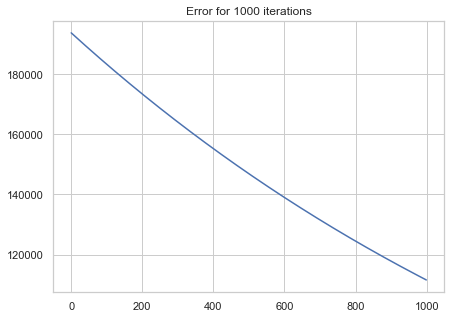

In [60]:
plt.figure(figsize=(7,5))
xr=np.arange(0,1000)
plt.plot(xr,np.array(error).transpose());
plt.title('Error for 1000 iterations');

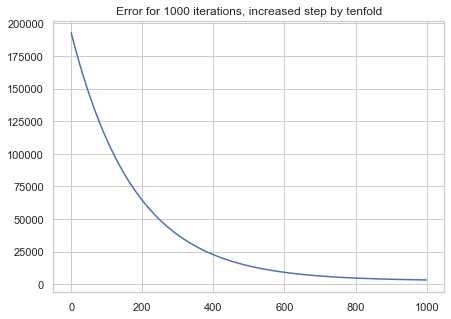

In [61]:
learning_rate=0.001  # 지난 값은 0.0001, 수렴 단계를 10배 증가스켜서 빠르게 수렴시킨다
initial_b0=0
initial_b1=0
num_iterations=1000
[b0,b1,e,slope,intersect,error] = run_gradient_descent(points,initial_b0,initial_b1, learning_rate, num_iterations)

plt.figure(figsize=(7,5))
xr=np.arange(0,1000)
plt.plot(xr,np.array(error).transpose());
plt.title('Error for 1000 iterations, increased step by tenfold');

Text(0.5, 1.0, 'Regression, alpha=0.01, initial values=(0,0), it=1000')

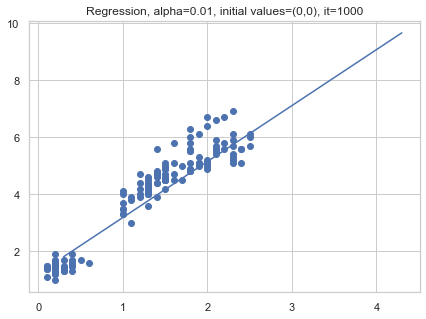

In [62]:
plt.figure(figsize=(7,5))
plt.scatter(X,Y)
xr=np.arange(0.3,5)
plt.plot(xr,(xr*b1)+ b0);
plt.title('Regression, alpha=0.01, initial values=(0,0), it=1000')

Text(0.5, 1.0, 'Error for 1000 iterations, step 0.001, random initial parameter values, normalized initail values')

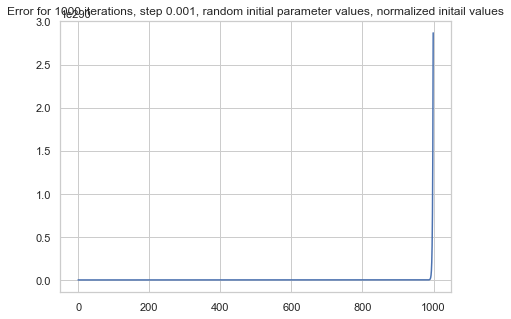

In [63]:
learning_rate=0.85 # 지난 값은 0.0001 이었다.
initial_b0 =0
initial_b1=0
num_iteratios =1000

[b0,b1,e,slope,intersect,error] = run_gradient_descent(points,initial_b0,initial_b1, learning_rate, num_iterations)

plt.figure(figsize=(7,5))
xr=np.arange(0,1000)

plt.plot(xr,np.array(error).transpose());
plt.title('Error for 1000 iterations, step 0.001, random initial parameter values, normalized initail values')

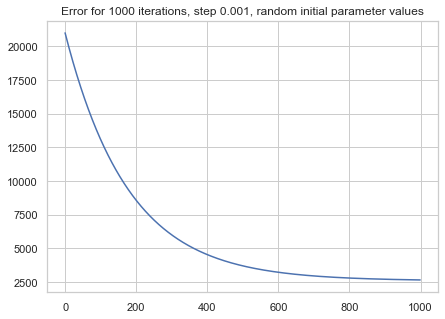

In [64]:
learning_rate =0.001 # 지난 번과 같음
initial_b0=0.8       # 가짜 랜덤 값
initial_b1=1.5         # 가짜 랜덤 값
num_iterations=1000

[b0,b1,e,slope,intersect,error] = run_gradient_descent(points,initial_b0,initial_b1, learning_rate, num_iterations)

plt.figure(figsize=(7,5))
xr=np.arange(0,1000)
plt.plot(xr,np.array(error).transpose());
plt.title('Error for 1000 iterations, step 0.001, random initial parameter values');

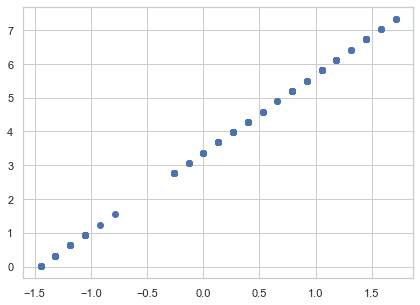

In [73]:
learning_rate =0.001 # 지난 번과 같음
initial_b0=0.8       # 가짜 랜덤 값
initial_b1=1.5         # 가짜 랜덤 값
num_iterations=1000


x_mean =np.mean(points[:,0])
y_mean = np.mean(points[:,1])

x_std= np.std(points[:,0])
y_std= np.std(points[:,1])

X_normalized =(points[:,0] - x_mean) / x_std
Y_normalized =(points[:,0] - y_mean) / y_std

plt.figure(figsize=(7,5))
plt.scatter(X_normalized, Y_normalized)

# 여기서부터 그래프가 이상함.

Text(0.5, 1.0, 'Error for 1000 iterations, step 0.001, random initial parameter values, normalized initail values')

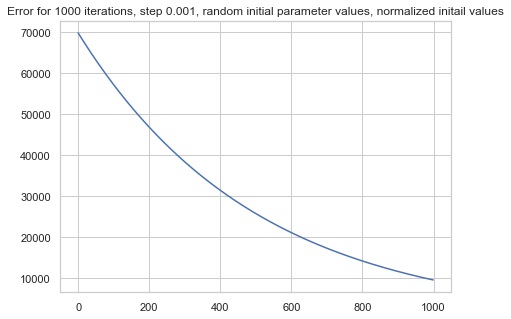

In [68]:
points=np.dstack((X_normalized,Y_normalized))[0]
learning_rate=0.001 # 지난번과 같음
initial_b0 =0.8
initial_b1=1.5

num_iteratios =1000
[b0,b1,e,slope,intersect,error] = run_gradient_descent(points,initial_b0,initial_b1, learning_rate, num_iterations)

plt.figure(figsize=(7,5))
xr=np.arange(0,1000)

plt.plot(xr,np.array(error).transpose());
plt.title('Error for 1000 iterations, step 0.001, random initial parameter values, normalized initail values')

# 원래 데이터의 크기와 중심점을깢기 위해 결과를 얻은 후에 역정규화 denormalization을 해야 한다는 것이다.